Step1: Importing libraries

In [30]:
import numpy as np
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from keras.layers import BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.utils import plot_model
from IPython.display import SVG, Image
from livelossplot.inputs.tf_keras import PlotLossesCallback


Step3: Our Dataset

In [31]:
for folder in os.listdir("C:/Users/Admin/Documents/DL_project/data"):
    print(str(len(os.listdir("C:/Users/Admin/Documents/DL_project/data/" + folder))) + " folders of differents facial expression in "+ folder + " Dataset :")
    for expression in os.listdir("C:/Users/Admin/Documents/DL_project/data/" + folder):
        print(str(len(os.listdir("C:/Users/Admin/Documents/DL_project/data/" + folder + "/" + expression))) + " images of " + expression + " facial expression")



7 folders of differents facial expression in Test Dataset :
958 images of angry facial expression
111 images of disgust facial expression
1024 images of fear facial expression
1774 images of happy facial expression
1233 images of neutral facial expression
1247 images of sad facial expression
831 images of surprise facial expression
7 folders of differents facial expression in Train Dataset :
3995 images of angry facial expression
436 images of disgust facial expression
4097 images of fear facial expression
7215 images of happy facial expression
4965 images of neutral facial expression
4830 images of sad facial expression
3171 images of surprise facial expression


Step4: Creating train and test images

In [32]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("C:/Users/Admin/Documents/DL_project/data/Train",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("C:/Users/Admin/Documents/DL_project/data/Test",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Step5: Building the CNN Model
1/ Initialising the CNN

In [33]:
model = Sequential()

2/ 1st Convolution layer

In [34]:
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

3/ 2nd Convolution layer

In [35]:
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

4/ 3rd Convolution layer

In [36]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

5/ 4th Convolution layer

In [37]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

6/ Flattening

In [38]:
model.add(Flatten())

7/ Fully connected layer 1st layer

In [39]:
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25)) 

8/ Fully connected layer 2nd layer

In [40]:
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(7, activation='softmax'))
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

Step6: visualization of the model architecture 

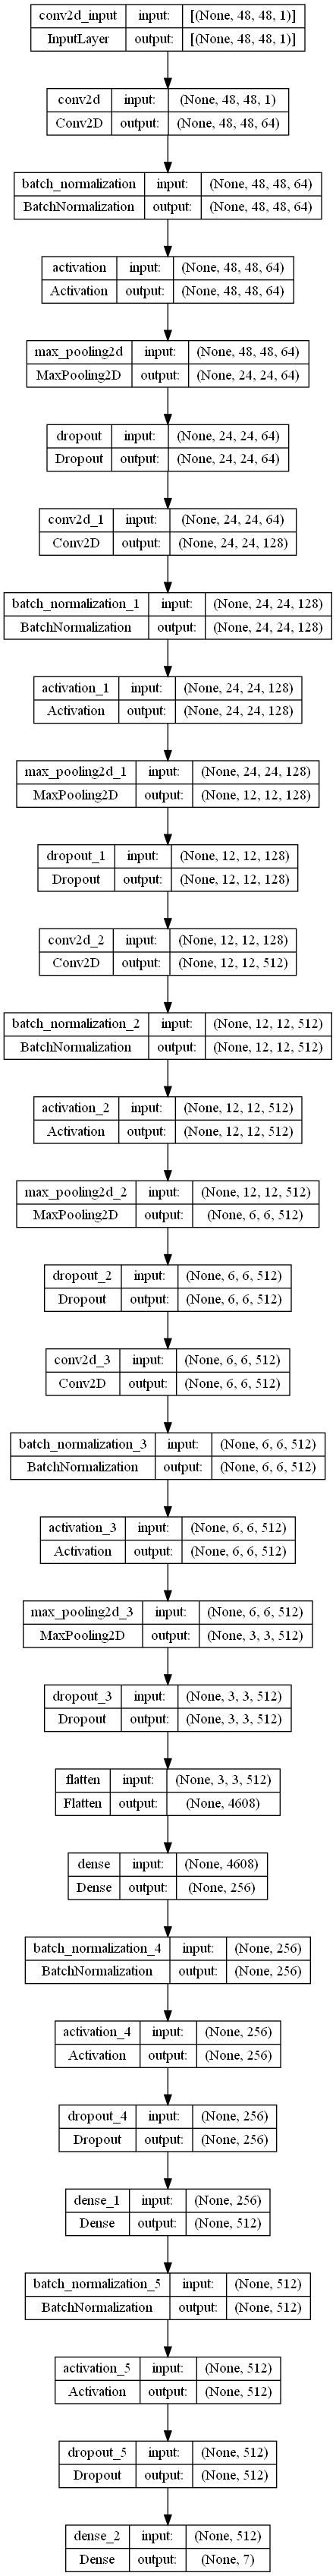

In [41]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)

Step 7 :training the model and evaluating the results.

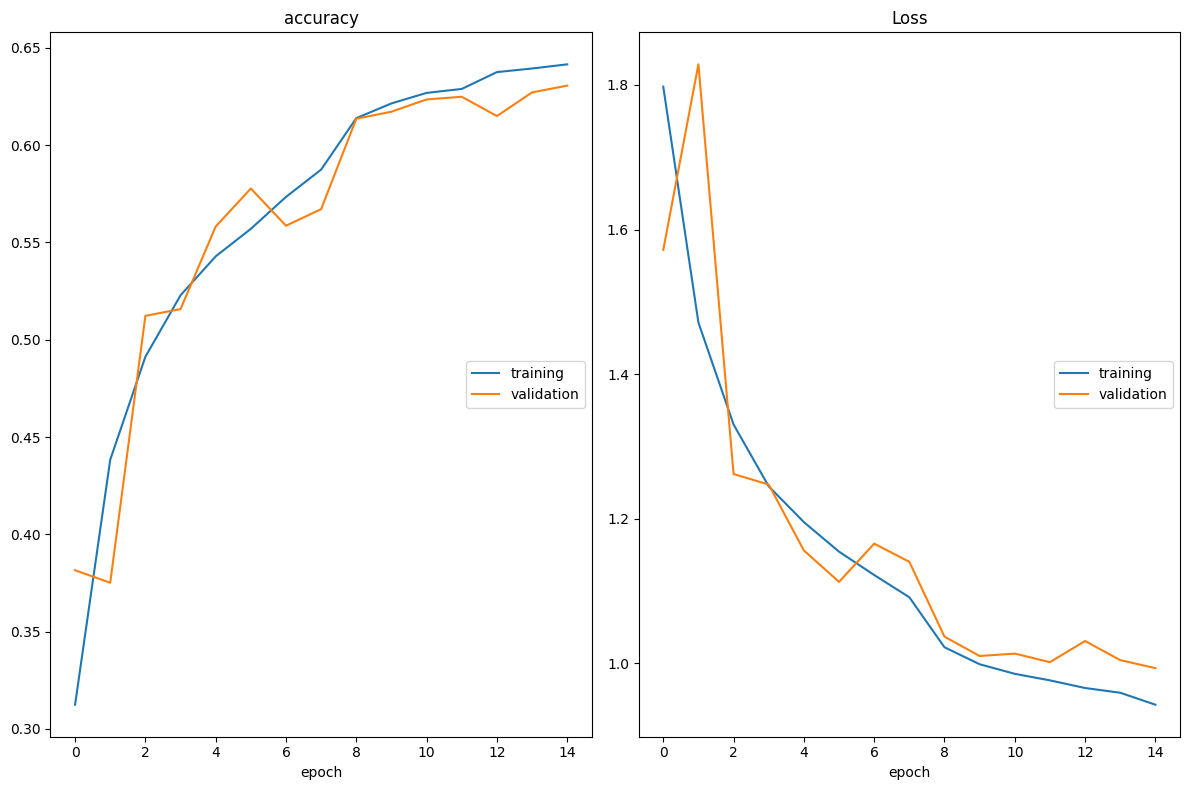

accuracy
	training         	 (min:    0.312, max:    0.642, cur:    0.642)
	validation       	 (min:    0.375, max:    0.631, cur:    0.631)
Loss
	training         	 (min:    0.943, max:    1.798, cur:    0.943)
	validation       	 (min:    0.993, max:    1.828, cur:    0.993)

Epoch 15: saving model to model_weights.h5
448/448 [==============================] - 1153s 3s/step - loss: 0.9429 - accuracy: 0.6415 - val_loss: 0.9935 - val_accuracy: 0.6306 - lr: 1.0000e-05
CPU times: total: 10h 43min 15s
Wall time: 8h 48min 46s


In [42]:
%%time
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

Step 8 : saving the model in json format with its weights also saved.

In [ ]:
model_json = model.to_json()
model.save_weights('model_weights.h5')
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Step 9 : loading the model and weights and making Predictions.

In [2]:
from keras.models import model_from_json
class FacialExpressionModel(object):
    EMOTIONS_LIST = ["Angry", "Disgust",
                    "Fear", "Happy",
                    "Neutral", "Sad",
                    "Surprise"]
    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)
        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model.make_predict_function()
    def predict_emotion(self, img):
        self.preds = self.loaded_model.predict(img)
        return FacialExpressionModel.EMOTIONS_LIST[np.argmax(self.preds)]

Step 10 : getting the frames of the video and will perform the predictions on that.

In [27]:
import cv2
facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
model = FacialExpressionModel("model.json", "model_weights.h5")
font = cv2.FONT_HERSHEY_SIMPLEX
class VideoCamera(object):
    def __init__(self):
        self.video = cv2.VideoCapture(0)
    def __del__(self):
        self.video.release()
    # returns camera frames along with bounding boxes and predictions
    def get_frame(self):
        _, fr = self.video.read()
        if not _:
            return None # Handle empty frame situation
        gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
        faces = facec.detectMultiScale(gray_fr, 1.3, 5)
        for (x, y, w, h) in faces:
            fc = gray_fr[y:y+h, x:x+w]
            roi = cv2.resize(gray_fr[y:y+h, x:x+w], (48, 48))
            pred = model.predict_emotion(roi[np.newaxis, :, :, np.newaxis])
            cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
            cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)
        return fr

Step 11 : function for calling the above code and showing the output video

In [29]:
def gen(camera):
    while True:
        frame = camera.get_frame()
        if frame is None:
            break
        cv2.imshow('Facial Expression Recognization',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()
gen(VideoCamera())


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


Step 12 : gen function